In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("C://Users//japje//Documents//AI_project//transformed_ebay_data.csv")

In [3]:
df.head()

,Unnamed: 0,num__Price,num__Feedback Score,cat__Listing Type_Auction,cat__Listing Type_AuctionWithBIN,cat__Listing Type_FixedPrice,cat__Listing Type_StoreInventory,cat__Shipping Type_Calculated,cat__Shipping Type_CalculatedDomesticFlatInternational,cat__Shipping Type_Flat,...,remainder__Large Image URL,remainder__Super Size Image URL,remainder__View Item URL,remainder__Marketplace,remainder__Time duration,remainder__Store URL_flag,remainder__Large Image URL_flag,remainder__Super Size Image URL_flag,remainder__Exchange_rate,remainder__Price_in_USD
0,0,-0.072931,-0.302147,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,https://www.ebay.com/itm/Chicken-Soup-Soul-Chr...,EBAY-US,7.000000,0,0,0,1.0,3.99
1,1,-0.064066,-0.302491,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,https://i.ebayimg.com/00/s/MTUwMFgxMTM4/z/oooA...,https://i.ebayimg.com/00/s/MTUwMFgxMTM4/z/oooA...,https://www.ebay.com/itm/CreativeHavenHome-for...,EBAY-US,61.041667,0,1,1,1.0,6.88
2,2,-0.064802,-0.303912,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,https://i.ebayimg.com/00/s/NTMwWDQ2Nw==/z/BzkA...,https://i.ebayimg.com/00/s/NTMwWDQ2Nw==/z/BzkA...,https://www.ebay.com/itm/Dead-Winter-Beware-Kr...,EBAY-US,29.749769,0,1,1,1.0,6.64
3,3,-0.070170,3.955687,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,https://i.ebayimg.com/00/s/MzE1WDUwMA==/z/S4wA...,https://i.ebayimg.com/00/s/MzE1WDUwMA==/z/S4wA...,https://www.ebay.com/itm/Christmas-Martha-Stew...,EBAY-US,61.041667,1,1,1,1.0,4.89
4,4,-0.029952,-0.297746,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,https://i.ebayimg.com/00/s/MTE4M1gxMDcz/z/qJYA...,https://i.ebayimg.com/00/s/MTE4M1gxMDcz/z/qJYA...,https://www.ebay.com/itm/Lot-10-Christmas-Pict...,EBAY-US,30.000000,0,1,1,1.0,18.00


The analysis involved building a predictive model to estimate eBay item prices in USD (remainder__Price_in_USD) based on various factors such as seller feedback, item condition, and listing type. A subset of relevant predictors, including num__Feedback Score, remainder__Positive Feedback %, cat__Condition_*, and cat__Listing Type_*, was selected based on their potential influence on price. Missing values in these columns were handled by removing incomplete rows. The dataset was then split into training (80%) and testing (20%) subsets to ensure robust model evaluation.

A linear regression model was trained using the training data to establish the relationships between predictors and the target variable. The model was evaluated on the testing set using key metrics: Mean Squared Error (MSE), which measures the average prediction error, and R-squared (R²), which indicates how well the model explains variance in the data. Additionally, the model coefficients were analyzed to interpret the impact of each predictor on the price.

To visualize the model's performance, a scatter plot was generated comparing actual prices with predicted values. An ideal prediction would align points closely along the diagonal line, representing perfect agreement between actual and predicted prices. Overall, the analysis provides insights into the factors driving eBay pricing and evaluates the effectiveness of a linear regression approach in modeling these relationships.








Linear Regression Results for target: remainder__Price_in_USD
Mean Squared Error (MSE): 1.00
R-squared (R2): 0.18
Coefficients:
  num__Feedback Score: -0.2000
  remainder__Positive Feedback %: -0.0873
  remainder__Time duration: -0.1745
  cat__Top Rated Seller_True: -0.0381
  cat__Listing Type_Auction: -0.3984
Intercept: 2.6246

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---



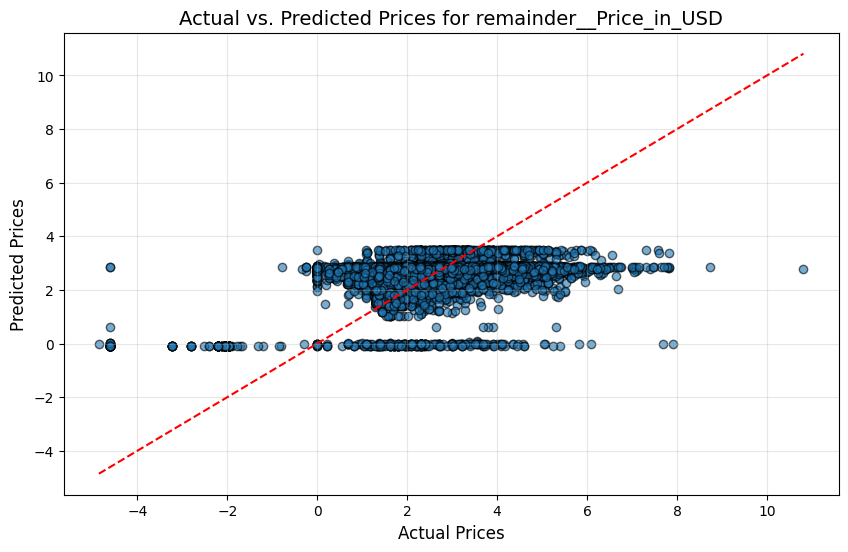

Linear Regression Results for target: remainder__Price_in_USD
Mean Squared Error (MSE): 1.02
R-squared (R2): 0.16
Coefficients:
  num__Feedback Score: -0.2035
  remainder__Positive Feedback %: -0.0952
  remainder__Time duration: -0.1565
  cat__Listing Type_FixedPrice: 0.3638
Intercept: 2.6239

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---



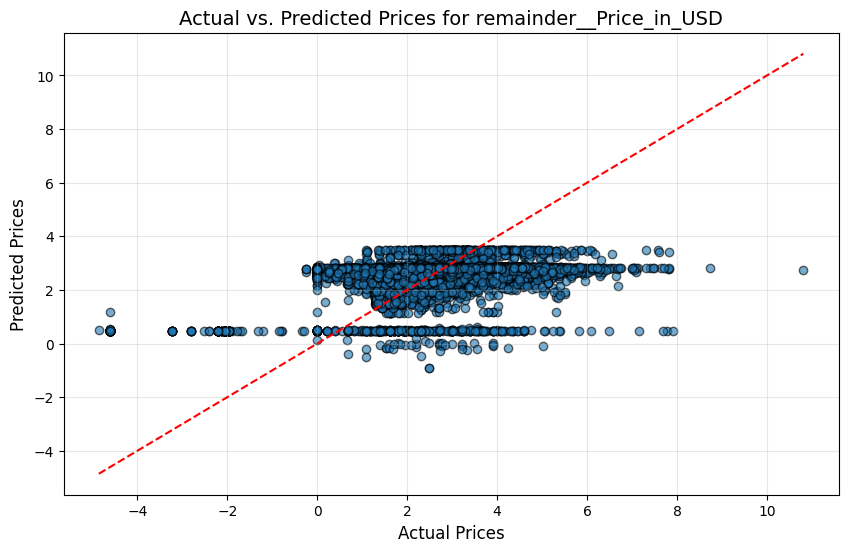

Linear Regression Results for target: remainder__Price_in_USD
Mean Squared Error (MSE): 1.14
R-squared (R2): 0.06
Coefficients:
  num__Feedback Score: -0.1849
  remainder__Positive Feedback %: -0.1012
  remainder__Time duration: -0.1398
  cat__Condition_Brand New: 0.0287
  cat__Condition_Used: 0.0336
Intercept: 2.6237

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---



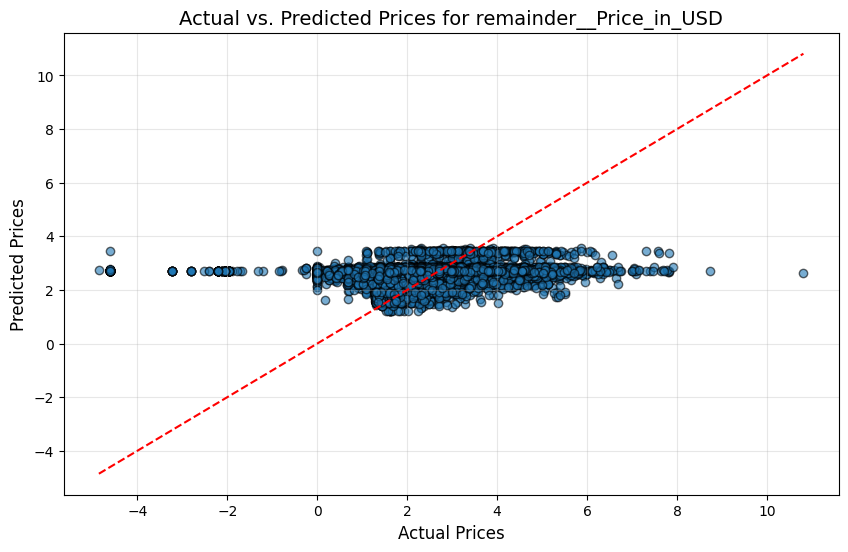

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
csv_file_path = "C://Users//japje//Documents//AI_project//transformed_ebay_data.csv"  # Replace with your file path
df = pd.read_csv(csv_file_path)

# Define different sets of predictors and target variables
configurations = [
    {
        'target': 'remainder__Price_in_USD',
        'predictors': [
            'num__Feedback Score',
            'remainder__Positive Feedback %',
            'remainder__Time duration',
            'cat__Top Rated Seller_True',
            'cat__Listing Type_Auction'
        ]
    },
    {
        'target': 'remainder__Price_in_USD',
        'predictors': [
            'num__Feedback Score',
            'remainder__Positive Feedback %',
            'remainder__Time duration',
            'cat__Listing Type_FixedPrice'
        ]
    },
    {
        'target': 'remainder__Price_in_USD',
        'predictors': [
            'num__Feedback Score',
            'remainder__Positive Feedback %',
            'remainder__Time duration',
            'cat__Condition_Brand New',
            'cat__Condition_Used'
        ]
    }
]

# Iterate through each configuration
for config in configurations:
    target = config['target']
    predictors = config['predictors']

    # Filter the dataset for selected columns
    df_filtered = df[[target] + predictors].dropna()  # Drop rows with missing values

    # Prepare data for training
    X = df_filtered[predictors]
    y = df_filtered[target]

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Transform target if necessary
    if target == 'remainder__Price_in_USD':
        y = np.log(y)  # Log transform the target for better fitting

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Linear Regression Results for target: {target}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("Coefficients:")
    for predictor, coef in zip(predictors, model.coef_):
        print(f"  {predictor}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print("\n---" * 20 + "\n")

    # Visualize the predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f'Actual vs. Predicted Prices for {target}', fontsize=14)
    plt.xlabel('Actual Prices', fontsize=12)
    plt.ylabel('Predicted Prices', fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


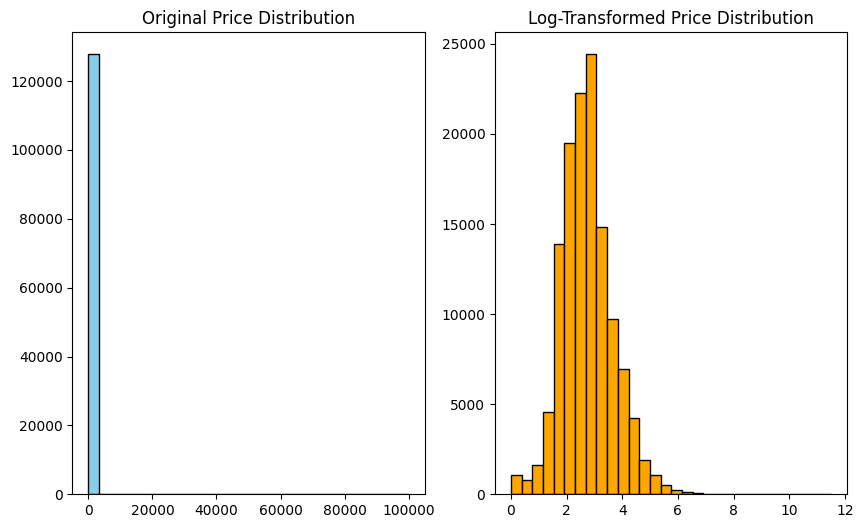

In [6]:
# Apply log transformation to price
df_filtered['log_price'] = np.log1p(df_filtered['remainder__Price_in_USD'])

# Visualize distribution before and after transformation
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df_filtered['remainder__Price_in_USD'], bins=30, color='skyblue', edgecolor='k')
plt.title('Original Price Distribution')

plt.subplot(1, 2, 2)
plt.hist(df_filtered['log_price'], bins=30, color='orange', edgecolor='k')
plt.title('Log-Transformed Price Distribution')
plt.show()


In [7]:
# Add interaction feature: Feedback Score * Positive Feedback %
df_filtered['interaction_feedback'] = df_filtered['num__Feedback Score'] * df_filtered['remainder__Positive Feedback %']

# Include the new feature in the predictors
predictors.append('interaction_feedback')


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_rf_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R2: {r2_rf:.2f}")


Random Forest MSE: 0.58
Random Forest R2: 0.52


In [9]:
# Group data by listing type and calculate mean price
listing_price_analysis = df_filtered.groupby('cat__Listing Type_Auction')['remainder__Price_in_USD'].mean()

print("Average Prices by Listing Type:")
print(listing_price_analysis)

Average Prices by Listing Type:
cat__Listing Type_Auction
0.0    27.877047
1.0    18.840036
Name: remainder__Price_in_USD, dtype: float64


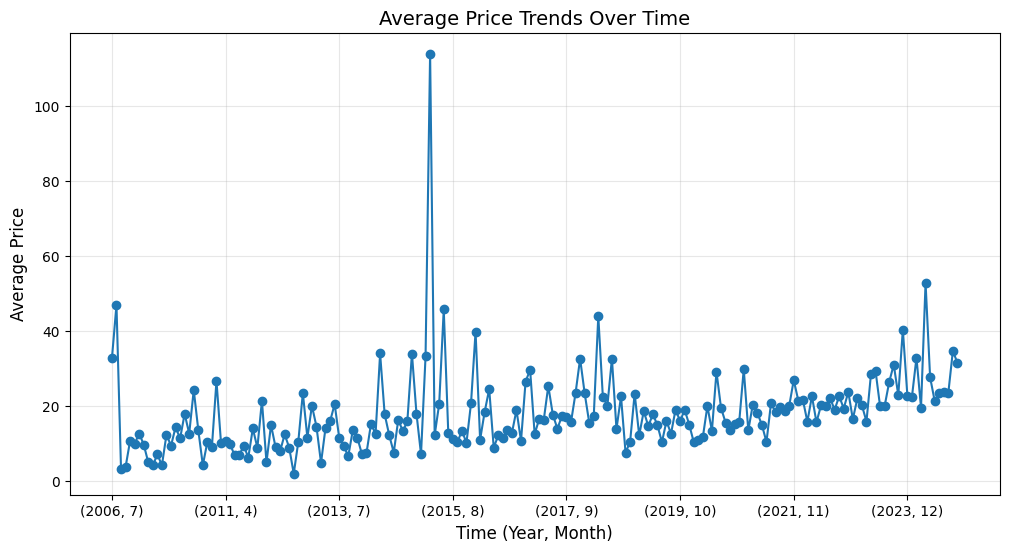

In [10]:
# Convert Start Time to datetime if available
df['remainder__Start Time'] = pd.to_datetime(df['remainder__Start Time'], errors='coerce')

# Extract month and year
df['month'] = df['remainder__Start Time'].dt.month
df['year'] = df['remainder__Start Time'].dt.year

# Group by month and year
monthly_trends = df.groupby(['year', 'month'])['remainder__Price_in_USD'].mean()

# Plot trends
monthly_trends.plot(figsize=(12, 6), marker='o')
plt.title('Average Price Trends Over Time', fontsize=14)
plt.xlabel('Time (Year, Month)', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [11]:
# Group by Top Rated Seller status and calculate mean price
seller_analysis = df_filtered.groupby('cat__Top Rated Seller_True')['remainder__Price_in_USD'].mean()

print("Average Price by Top Rated Seller Status:")
print(seller_analysis)


Average Price by Top Rated Seller Status:
cat__Top Rated Seller_True
0.0    32.867891
1.0    22.133709
Name: remainder__Price_in_USD, dtype: float64


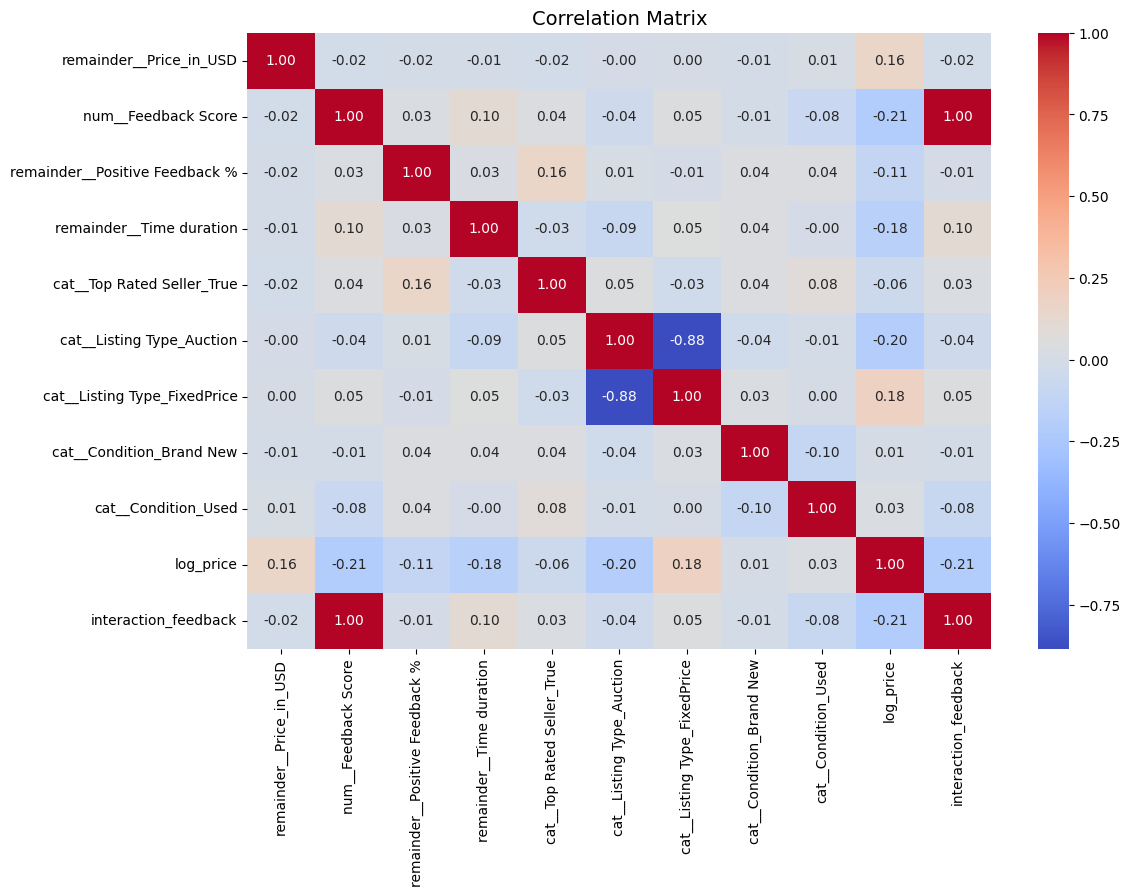

In [12]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df_filtered.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=14)
plt.show()
